In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

plt.rcParams['font.family'] = 'Source Code Pro for Powerline'
plt.rcParams['font.sans-serif'] = ['Arial']

0.522 -0.0 0.478


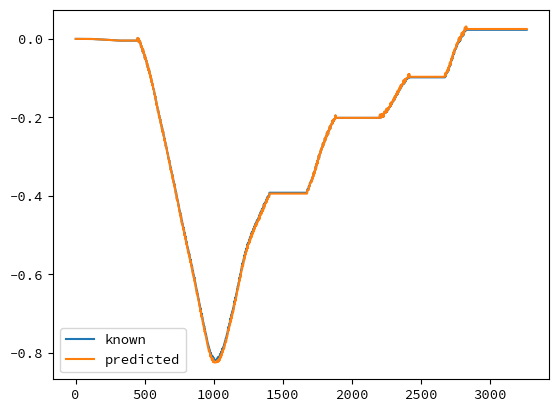

In [6]:
df1 = pd.read_csv('./files/real.csv', sep=' ')

# 已知曲线的数据
x_known = df1.iloc[:, 0]
y_known = df1.iloc[:, 1]

df2 = pd.read_csv('./files/siml.csv', sep=' ')

# 未知曲线的数据
x1 = df2.iloc[:, 0]
x2 = df2.iloc[:, 1]
x3 = df2.iloc[:, 2]

y_unknown = None


# 定义目标函数
def objective(coef, x1, x2, x3, y):
    y_pred = coef[0] * x1 + coef[1] * x2 + coef[2] * x3
    return np.sum((y - y_pred) ** 2)


# 定义约束条件
def constraint(coef):
    return 1 - np.sum(coef)


# 定义初始值
x0 = np.array([0.3, 0.3, 0.4])

# 定义约束条件
cons = [{'type': 'ineq', 'fun': lambda x: x[0]},
        {'type': 'ineq', 'fun': lambda x: x[1]},
        {'type': 'ineq', 'fun': lambda x: x[2]},
        {'type': 'eq', 'fun': constraint}]

# 最小化目标函数
res = minimize(objective, x0, args=(x1, x2, x3, y_known), constraints=cons)

# 计算未知曲线的数据
y_unknown = res.x[0] * x1 + res.x[1] * x2 + res.x[2] * x3

y_unknown_2 = 0.3 * x1 + 0.3 * x2 + 0.4 * x3

print(round(res.x[0], 3), round(res.x[1], 3), round(res.x[2], 3))

plt.plot(x_known, y_known, label='known')
# plt.plot(x_known, y_unknown_2, label='unknown')
plt.plot(x_known, y_unknown, label='predicted')
plt.legend()
plt.show()